In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd

In [2]:
path = tf.keras.utils.get_file("reviews.csv","https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P")

In [3]:
path

'/root/.keras/datasets/reviews.csv'

In [4]:
dataset = pd.read_csv('/root/.keras/datasets/reviews.csv')

In [5]:
dataset.head()

,Unnamed: 0,text,sentiment
0,0,So there is no way for me to plug it in here i...,0
1,1,Good case Excellent value.,1
2,2,Great for the jawbone.,1
3,3,Tied to charger for conversations lasting more...,0
4,4,The mic is great.,1


In [6]:
sentences = dataset['text'].tolist()

In [7]:
lables = dataset['sentiment'].tolist()

In [8]:
for x in range(2):
    print(sentences[x])
    print(lables[x])
    print('\n')

So there is no way for me to plug it in here in the US unless I go by a converter.
0


Good case Excellent value.
1




In [9]:
import tensorflow_datasets as tfds

In [10]:
vocab_size = 1000
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(sentences,vocab_size,max_subword_length=5)

In [11]:
print("vacab size is: ",tokenizer.vocab_size)

vacab size is:  999


In [12]:
num = 5
print(sentences[num])
encoder = tokenizer.encode(sentences[num])
print(encoder)

I have to jiggle the plug to get it to line up right to get decent volume.
[4, 31, 6, 849, 162, 450, 12, 1, 600, 438, 775, 6, 175, 14, 6, 55, 213, 159, 474, 775, 6, 175, 614, 380, 295, 148, 72, 789]


In [13]:
for i in encoder:
    print(tokenizer.decode([i]))

I 
have 
to 
j
ig
gl
e 
the 
pl
ug
 
to 
get 
it 
to 
li
ne 
up 
right
 
to 
get 
dec
ent 
vo
lu
me
.


In [14]:
for i,sentence in enumerate(sentences):
    sentences[i] = tokenizer.encode(sentence)
print(sentences[5])

[4, 31, 6, 849, 162, 450, 12, 1, 600, 438, 775, 6, 175, 14, 6, 55, 213, 159, 474, 775, 6, 175, 614, 380, 295, 148, 72, 789]


In [15]:
max_length = 50
trunc_type = 'post'
padding_type = 'post'

In [16]:
sequences_padded = pad_sequences(sentences,maxlen=max_length,padding=padding_type,truncating=trunc_type)

In [17]:
training_size = int(len(sentences)*0.8)

In [18]:
training_sequences = sequences_padded[0:training_size]
testing_sequences = sequences_padded[training_size:]
training_labels = lables[0:training_size]
testing_labels = lables[training_size:]

In [19]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [20]:
embedding_dim = 16
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [21]:
num_epochs = 30
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [22]:
history = model.fit(training_sequences,training_labels_final,epochs=num_epochs,validation_data=(testing_sequences,testing_labels_final))

Epoch 1/30
50/50 [==============================] - 2s 8ms/step - loss: 0.6911 - accuracy: 0.5317 - val_loss: 0.6979 - val_accuracy: 0.4211
Epoch 2/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6861 - accuracy: 0.5386 - val_loss: 0.6995 - val_accuracy: 0.4286
Epoch 3/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6797 - accuracy: 0.5643 - val_loss: 0.6994 - val_accuracy: 0.4436
Epoch 4/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6681 - accuracy: 0.5782 - val_loss: 0.6841 - val_accuracy: 0.5113
Epoch 5/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6515 - accuracy: 0.6547 - val_loss: 0.6756 - val_accuracy: 0.5238
Epoch 6/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6277 - accuracy: 0.7037 - val_loss: 0.6547 - val_accuracy: 0.6190
Epoch 7/30
50/50 [==============================] - 0s 3ms/step - loss: 0.5971 - accuracy: 0.7489 - val_loss: 0.6478 - val_accuracy: 0.5789
Epoch 8/30
50/50 [==

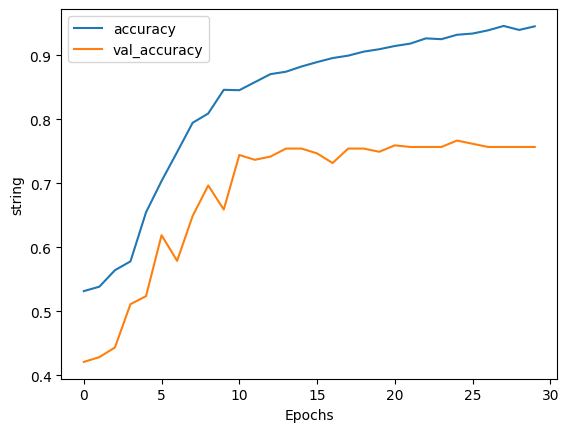

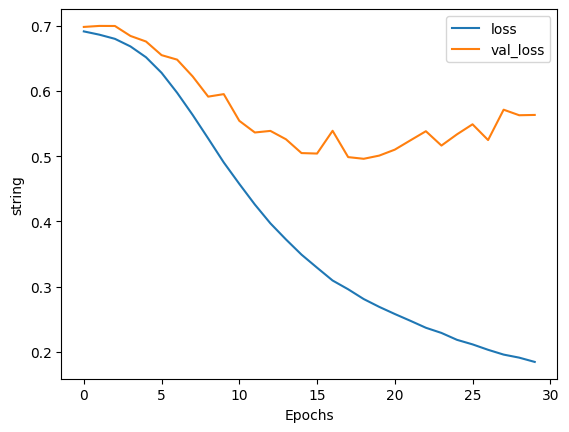

In [23]:
import matplotlib.pyplot as plt
def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('Epochs')
    plt.ylabel('string')
    plt.legend([string,'val_'+string])
    plt.show()

plot_graphs(history,'accuracy')
plot_graphs(history,'loss')

In [24]:
def predict_review(model,new_sentences,maxlen=max_length,show_padded_sequence=True):
    new_sequences = []
    for i,frvw in enumerate(new_sentences):
        new_sequences.append(tokenizer.encode(frvw))
    trunc_type = 'post'
    padding_type = 'post'
    new_review_padded = pad_sequences(new_sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)
    classes = model.predict(new_review_padded)
    for x in range(len(new_sentences)):
        if (show_padded_sequence):
            print(new_review_padded[x])
        print(new_sentences[x])
        print(classes[x])
        print('\n')

In [25]:
fake_reviews = ['i love this phone',"everything was cold"]

In [26]:
predict_review(model,fake_reviews)

1/1 [==============================] - 0s 64ms/step
[425 281  16  25   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
i love this phone
[0.86008227]


[272 100 775   9 525 843   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
everything was cold
[0.47260642]




In [27]:
def fit_model_now(model,sentences):
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    model.summary()
    history = model.fit(training_sequences,training_labels_final,epochs=num_epochs,validation_data=(testing_sequences,testing_labels_final))
    return history

In [28]:
def plot_results(history):
    plot_graphs(history,'accuracy')
    plot_graphs(history,'loss')

In [29]:
def fit_model_and_show_result(model,sentences):
    history = fit_model_now(model,sentences)
    plot_results(history)
    predict_review(model,sentences)

In [30]:
model_bidi_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 16)            16000     
                                                                 
 bidirectional (Bidirection  (None, 32)                4224      
 al)                                                             
                                                                 
 dense_2 (Dense)             (None, 6)                 198       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 20429 (79.80 KB)
Trainable params: 20429 (79.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
50/50 [==============================] - 5s 41ms/step - loss: 0.6921 - ac

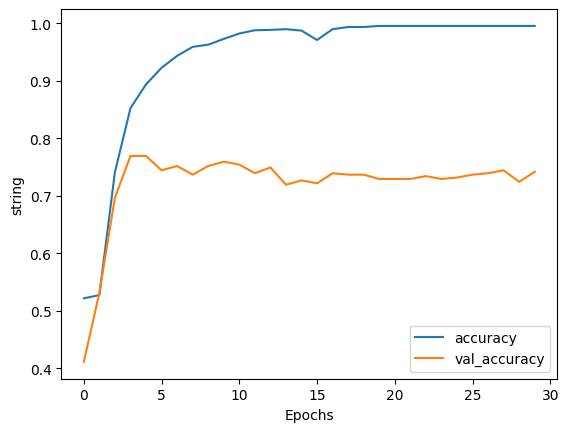

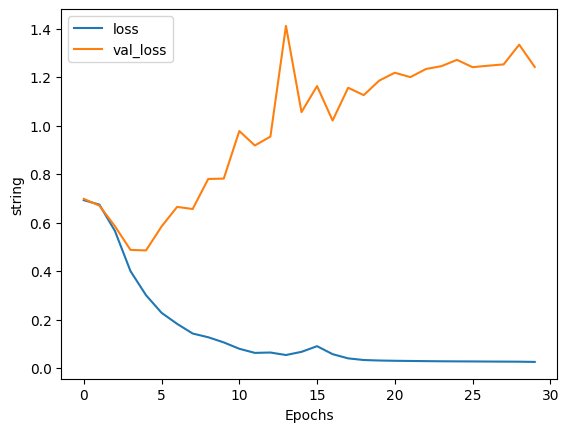

1/1 [==============================] - 1s 508ms/step
[425 281  16  25   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
i love this phone
[0.99414486]


[272 100 775   9 525 843   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
everything was cold
[0.05150534]




In [31]:
fit_model_and_show_result(model_bidi_lstm,fake_reviews)

In [32]:
model_multiple_bidi_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length= max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 16)            16000     
                                                                 
 bidirectional_1 (Bidirecti  (None, 50, 32)            4224      
 onal)                                                           
                                                                 
 bidirectional_2 (Bidirecti  (None, 32)                6272      
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 6)                 198       
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 26701 (104.30 KB)
Trainable params: 2670

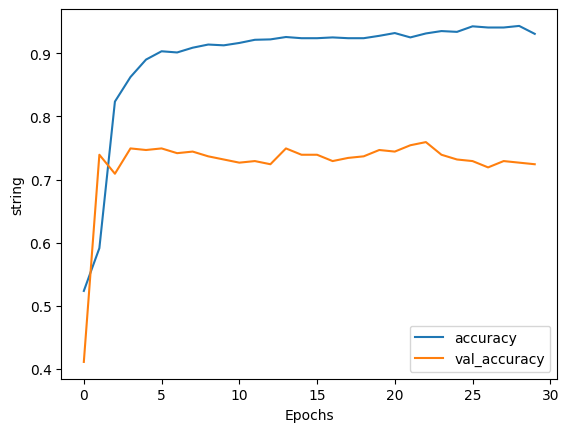

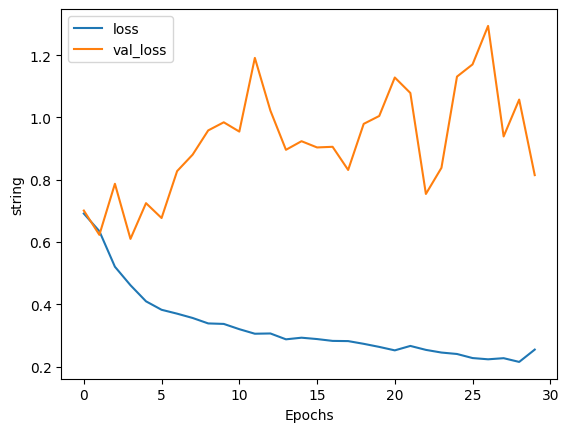

1/1 [==============================] - 1s 1s/step
[425 281  16  25   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
i love this phone
[0.9969392]


[272 100 775   9 525 843   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
everything was cold
[0.23806177]




In [33]:
fit_model_and_show_result(model_multiple_bidi_lstm,fake_reviews)

In [34]:
my_reviews = ['lovely','dreadful','stay away', 'everything was hot exactly as i wanted']

In [35]:
print("======================================================\n","embedded only:\n","=======================")
predict_review(model,my_reviews,show_padded_sequence=False)

 embedded only:
1/1 [==============================] - 0s 19ms/step
lovely
[0.9086882]


dreadful
[0.33200404]


stay away
[0.63902867]


everything was hot exactly as i wanted
[0.6876748]




In [36]:
print("======================================================\n","embedded only:\n","=======================")
predict_review(model_bidi_lstm,my_reviews,show_padded_sequence=False)

 embedded only:
1/1 [==============================] - 0s 23ms/step
lovely
[0.9818325]


dreadful
[0.01320954]


stay away
[0.0309614]


everything was hot exactly as i wanted
[0.9414115]




In [37]:
print("======================================================\n","embedded only:\n","=======================")
predict_review(model_multiple_bidi_lstm,my_reviews,show_padded_sequence=False)

 embedded only:
1/1 [==============================] - 0s 27ms/step
lovely
[0.9985278]


dreadful
[0.23806177]


stay away
[0.24476585]


everything was hot exactly as i wanted
[0.99448484]


